# Linear Regression E-commerce

### Analysis Goals:
 - Determine correlation between platform usage and spending
 - Compare effectiveness of app vs website
 - Identify factors influencing customer spending
 - Guide platform development priorities  
This data can help the company make data-driven decisions about their digital platform strategy.

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Dataset Overview:
This dataset contains customer behavior data from an online clothing retailer that offers both in-store styling sessions and online purchasing options through a mobile app and website.

###　Business Context:
The company wants to determine whether to prioritize development of their mobile app or website based on customer behavior and spending patterns.

In [3]:
df = pd.read_csv("data/Ecommerce Customers.csv")

In [4]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


# Column Descriptions

## 1. Email
- Customer's email address
- Used for unique identification

## 2. Address
- Customer's shipping address
- Contains street, city, state, and ZIP code

## 3. Avatar
- Color preference or profile theme
- Possibly used for UI personalization

## 4. Avg. Session Length
- Average time spent per shopping session
- Measured in minutes
- Indicates browsing/shopping engagement

## 5. Time on App
- Time spent using the mobile app
- Measured in minutes
- Key metric for app effectiveness

## 6. Time on Website
- Time spent on the website
- Measured in minutes
- Key metric for website effectiveness

## 7. Length of Membership
- Duration of customer's membership
- Measured in years
- Indicates customer loyalty

## 8. Yearly Amount Spent
- Total annual spending
- Measured in dollars
- Target variable for prediction

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


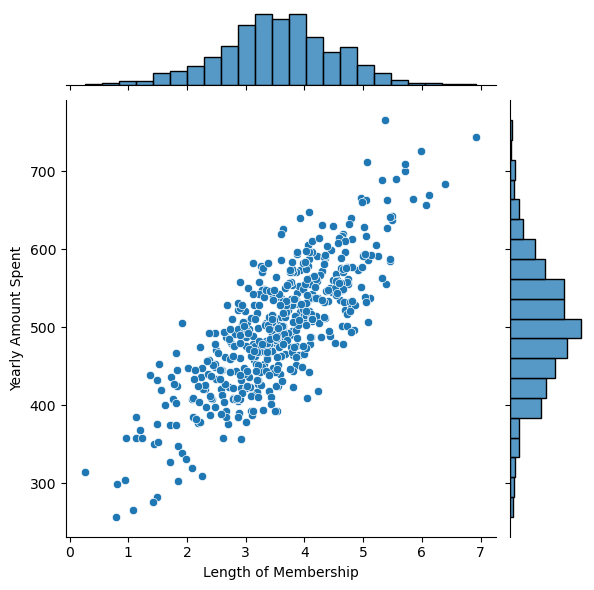

In [7]:
# EDA
sns.jointplot(x="Length of Membership", y="Yearly Amount Spent", data=df)

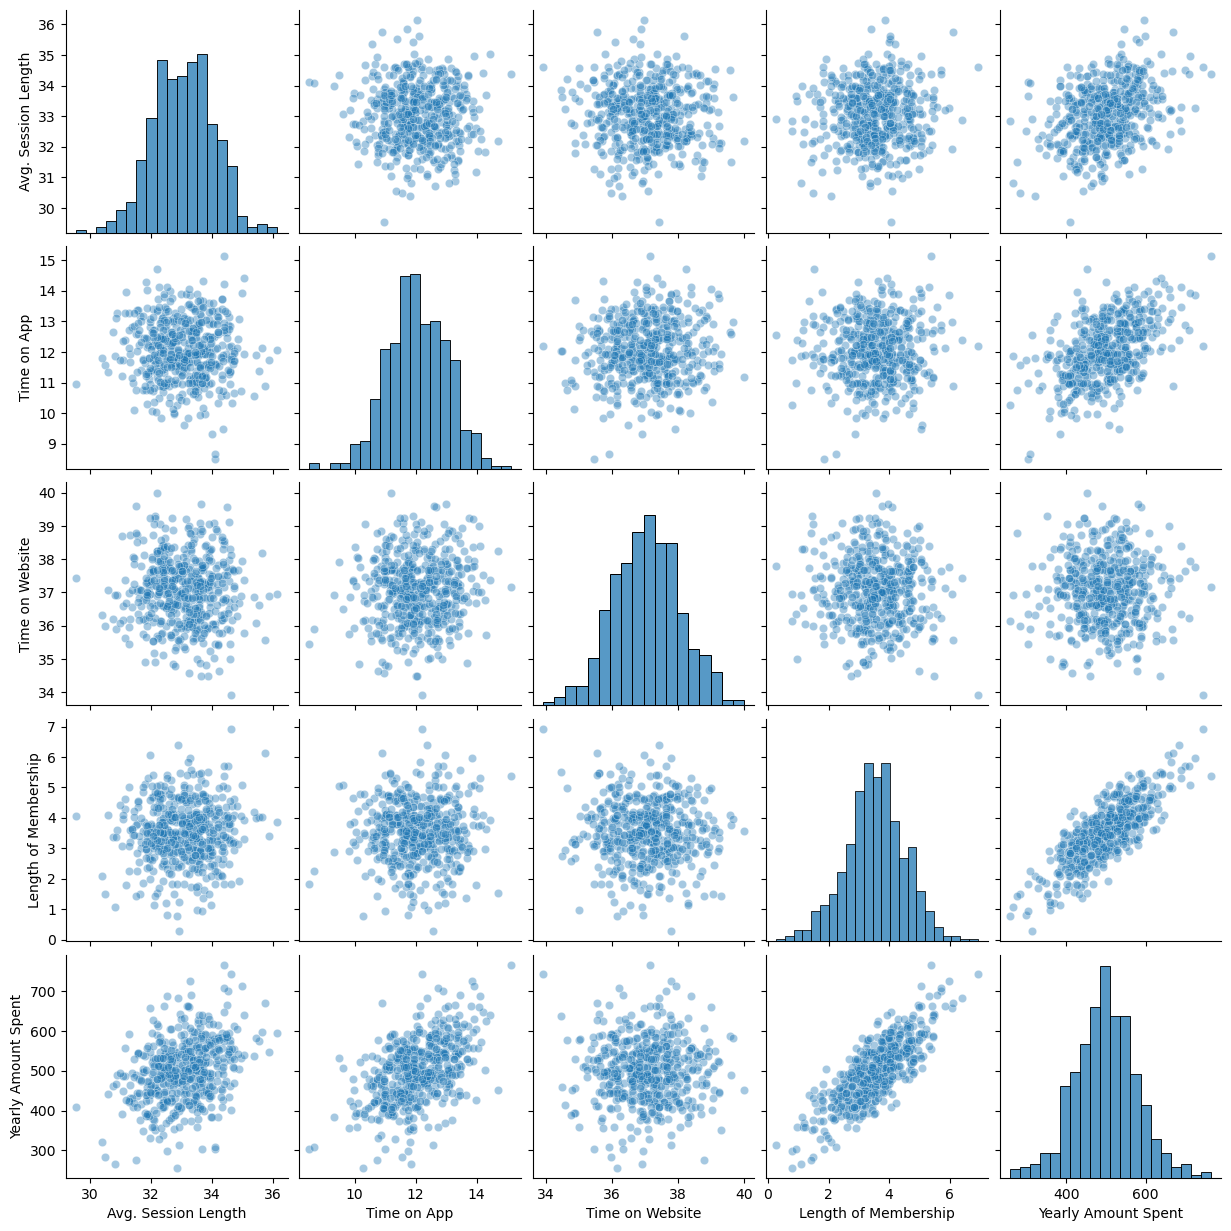

In [8]:
sns.pairplot(df, kind="scatter", plot_kws={"alpha":0.4})

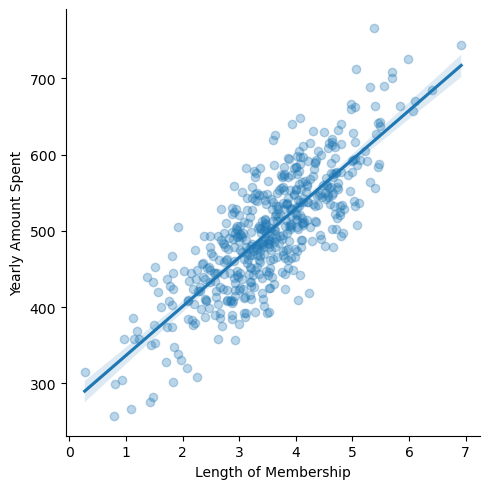

In [9]:
sns.lmplot(x="Length of Membership", y="Yearly Amount Spent", data=df, scatter_kws={"alpha": 0.3})

In [10]:
from sklearn.model_selection import train_test_split

In [15]:
# Pick model variables
X = df[["Avg. Session Length", "Time on App", "Time on Website", "Length of Membership"]]
y = df["Yearly Amount Spent"]

# Split the train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

In [17]:
# Training the liner regresion model
lm = LinearRegression()

In [18]:
lm.fit(X_train, y_train)

LinearRegression()

In [19]:
lm.coef_

array([25.5962591 , 38.78534598,  0.31038593, 61.89682859])

In [22]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=["Coef"])
cdf

,Coef
Avg. Session Length,25.596259
Time on App,38.785346
Time on Website,0.310386
Length of Membership,61.896829


In [25]:
cdf.iloc[2]

Coef    0.310386
Name: Time on Website, dtype: float64

In [26]:
predictions = lm.predict(X_test)

Text(0.5, 1.0, 'Evaluation')

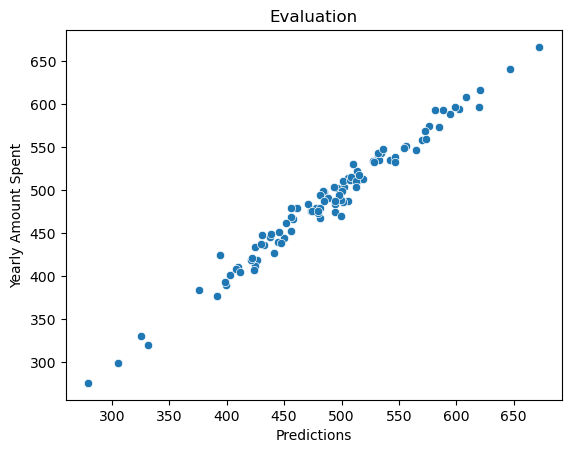

In [30]:
sns.scatterplot(x=predictions, y=y_test)
plt.xlabel("Predictions")
plt.title("Evaluation")

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

In [52]:
# Mean Absolute error, Mean Squared error, RMSE
print("Mean Absolute error: ", mean_absolute_error(y_test, predictions)) # 平均絕對誤差，直觀但對異常值不敏感
print("Mean Squared error: ", mean_squared_error(y_test, predictions)) # 平均平方誤差，對異常值敏感
print("RMSE: ", math.sqrt(mean_squared_error(y_test, predictions))) # 均方根誤差
print("R² Score:", r2_score(y_test, predictions))
# Residuals
residuals = y_test - predictions
# RSS: Residual Sum of Squares, 殘差平方和
RSS = np.sum(residuals)**2
print("RSS", RSS)

Mean Absolute error:  8.558441885315256
Mean Squared error:  109.8637411839406
RMSE:  10.481590584636503
R² Score: 0.9778130629184125
RSS 4877.087715062083


### Model Evaluation Metrics

1. **Mean Absolute Error (MAE) = 8.56**
   - Average absolute difference between predicted and actual values
   - Indicates average deviation of about $8.56 in predicted annual spending
   - Lower MAE indicates higher prediction accuracy

2. **Mean Squared Error (MSE) = 109.86**
   - Average of squared errors
   - Penalizes larger errors more than MAE

3. **Root Mean Squared Error (RMSE) = 10.48**
   - Square root of MSE
   - Predictions deviate from actual values by 10.48 on average

4. **R² Score = 0.978**
   - Ranges between 0 and 1
   - 0.978 means model explains 97.8% of data variance
   - Indicates excellent model fit

5. **Residual Sum of Squares (RSS) = 4,877.09**
   - Sum of all squared errors
   - Total error without averaging
   - Used to evaluate overall prediction error

### Model Conclusions:

1. **Model Performance Excellence**
   - R² value of 0.978 indicates strong fit
   - Error margins minimal relative to spending amounts

2. **Prediction Precision**
   - Mean error range: 8-10
   - High accuracy for annual revenue forecasting

3. **Business Applications**
   - Effective for customer spending forecasts
   - Strong foundation for strategic decisions

4. **Statistical Reliability**
   - High R² demonstrates robust model reliability
   - Error metrics within industry standards

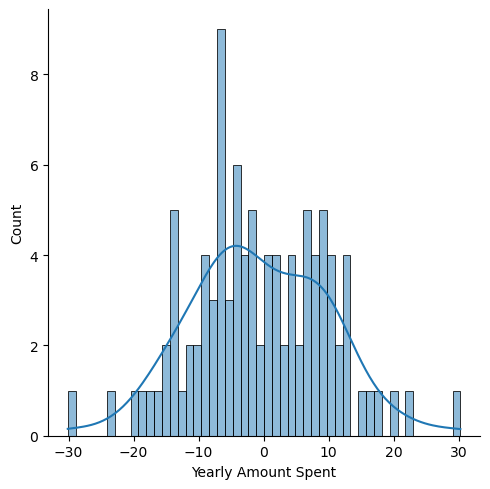

In [53]:
sns.displot(residuals, bins=50, kde=True)

In [45]:
import pylab
import scipy.stats as stats

<function matplotlib.pyplot.show(close=None, block=None)>

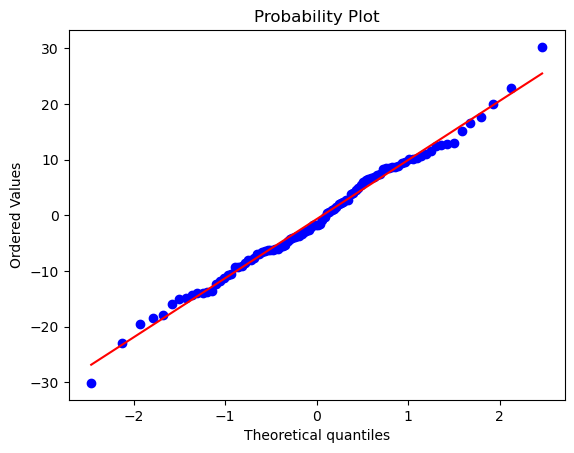

In [46]:
stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show

## App vs Website decision making：

In [55]:
# compare coefficient of App and Website
app_coef = lm.coef_[1]  # Time on App coefficient
web_coef = lm.coef_[2]  # Time on Website coefficient
print("Time on App coefficient: ", app_coef)
print("Time on Website coefficient: ", web_coef)

Time on App coefficient:  38.7853459848031
Time on Website coefficient:  0.31038593280149196


### Coefficient Analysis and Recommendations

1. **App vs Website Impact**
   - Time on App coefficient: 38.79 
   - Time on Website coefficient: 0.31 
   - App shows significantly higher revenue impact

2. **Mobile App Priority**
   - Each additional minute on app generates ~38.79
   - Strong correlation with yearly spending
   - Suggests prioritizing app development
   - Focus on user engagement features

3. **Website Improvement Opportunities**
   - Current low coefficient (0.31) indicates underperformance
   - Significant room for improvement
   - Potential areas for enhancement:
     - User interface optimization
     - Website loading speed
     - Mobile responsiveness
     - Checkout process streamlining

4. **Strategic Recommendations**
   - Primary: Invest in app development and features
   - Secondary: Investigate website inefficiencies
   - Consider cross-platform integration
   - Implement A/B testing for website improvements

5. **Long-term Considerations**
   - Monitor coefficient changes over time
   - Track user behavior across platforms
   - Evaluate ROI of platform improvements
   - Consider competitive analysis in both channels